In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib.inline
import os
os.chdir('C:\\Users\\erica\\OneDrive for Business\\01 Current Classes\\DSC478 - Machine Programming\\Assignment2')

UsageError: Line magic function `%matplotlib.inline` not found.


In [4]:
#import data
train_matrix = np.genfromtxt("trainMatrixModified.txt",delimiter="\t")
train_matrix_t = train_matrix.T
test_matrix = pd.read_csv("testMatrixModified.txt", delimiter = "\t",  header = None)
train_labels = np.genfromtxt("trainClasses.txt", delimiter = "\t" , usecols=(1), dtype=(int))
test_matrix = np.genfromtxt("testMatrixModified.txt",delimiter="\t")
test_matrix_t = test_matrix.T
test_labels = np.genfromtxt("testClasses.txt", delimiter = "\t", usecols=(1), dtype=(int))


### 1. a Create your own KNN classifier

In [9]:
from collections import Counter
import operator
def Knn(x, data, labels, K, function):
    if function == 0:
    ##euclidean dist
        distance = np.sqrt(((data - x)**2).sum(axis = 1))
    elif function == 1:
        ##cosine
        norm_data = np.array([np.linalg.norm(data[i]) for i in range(len(data))])
        norm_x = np.linalg.norm(x)
        similarity = np.dot(data, x)/(norm_data * norm_x)
        distance = 1 - similarity
    idx = np.argsort(distance)
    classCount={}
    for i in range(K):
        vote = labels[idx[i]]
        classCount[vote] = classCount.get(vote,0) + 1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1), reverse=True)
    return idx[:K], sortedClassCount[0][0]

In [10]:
answer , pred_class = Knn(test_matrix_t[0], train_matrix_t, train_labels, 5, 1)
print "The k-nearest neighbors are: %s" % answer 
print "The predicted class is: %s" % pred_class

The k-nearest neighbors are: [685 628 667 152 427]
The predicted class is: 1


### b. Create a function to compute the classification accuracy over the test data set

In [89]:
def accuracy(tlabels, x, data, labels, K, function):
    label_length = len(tlabels)
    error_count = 0.0
    for i in range(label_length):
        ids, prediction = Knn(test_matrix_t[i,:], train_matrix_t, train_labels, K ,0)
        if (prediction != tlabels[i]):
            error_count += 1.0
    error = error_count/float(label_length)
    return error

### c.Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors.

In [90]:
result = pd.DataFrame()
for i in range(0,20):
    result.loc[i,0] = i+1
    result.loc[i,1] =accuracy(test_labels, test_matrix_t, train_matrix_t, train_labels, i+1, 0)
    result.loc[i,2] = accuracy(test_labels, test_matrix_t, train_matrix_t, train_labels, i+1, 1)
result.columns = ['k', 'euclidean',' cosine']
result

,k,euclidean,cosine
0,1.0,0.220,0.220
1,2.0,0.215,0.215
2,3.0,0.190,0.190
3,4.0,0.230,0.230
4,5.0,0.185,0.185
5,6.0,0.255,0.255
6,7.0,0.235,0.235
7,8.0,0.270,0.270
8,9.0,0.250,0.250
9,10.0,0.295,0.295


### d.Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights

In [92]:
import math
TD = np.concatenate((train_matrix, test_matrix), axis = 1)
df = np.array([(TD!=0).sum(1)]).T
num_docs = len(TD[0,:])
nmatrix = np.ones(np.shape(TD), dtype=float)*num_docs
IDF = np.log2(np.divide(nmatrix, df))
tfidf = TD*IDF
new_data = tfidf.T


In [93]:
train2 = new_data[0:700,]
test2 = new_data[700:]

In [94]:
result2 = pd.DataFrame()
for i in range(0,20):
    result2.loc[i,0] = i+1
    result2.loc[i,1] =accuracy(test_labels, test2, train2, train_labels, i+1, 0)
    result2.loc[i,2] = accuracy(test_labels, test2, train2, train_labels, i+1, 1)
result2.columns = ['k', 'euclidean',' cosine']
result2

,k,euclidean,cosine
0,1.0,0.220,0.220
1,2.0,0.215,0.215
2,3.0,0.190,0.190
3,4.0,0.230,0.230
4,5.0,0.185,0.185
5,6.0,0.255,0.255
6,7.0,0.235,0.235
7,8.0,0.270,0.270
8,9.0,0.250,0.250
9,10.0,0.295,0.295


### 2. Classification using sk-learn

### a. Load and preprocess the data

In [9]:
vstable = pd.read_csv("bank_data.csv", index_col = 0 )

In [10]:
vstable.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [12]:
vstable.shape

(600, 11)

Separate pep as the target varaible from the other attributes

In [14]:
vs_records = vstable [['age', 'income', 'children','gender','region','married','car','savings_acct','current_acct','mortgage']]
vs_records.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
id,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [15]:
vs_target = vstable.pep
vs_target.head()

id
ID12101    YES
ID12102     NO
ID12103     NO
ID12104     NO
ID12105     NO
Name: pep, dtype: object

Create dummy variables in order to use sklearn 

In [16]:
vs_matrix = pd.get_dummies(vs_records[['age', 'income', 'children','gender','region','married','car','savings_acct','current_acct','mortgage']])
vs_matrix.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12101,48,17546.0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
ID12102,40,30085.1,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
ID12103,51,16575.4,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
ID12104,23,20375.4,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
ID12105,57,50576.3,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0


Divide data into training and test sets.

In [19]:
from sklearn.cross_validation import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, vs_target, test_size=0.2, random_state = 35)

print vs_test.shape
vs_test[0:5]

(120, 19)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12394,26,20950.7,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0
ID12389,33,14136.5,1,0,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0
ID12417,60,22110.1,2,0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0
ID12265,40,24904.0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0
ID12660,67,24858.4,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1


In [21]:
print vs_train.shape
vs_train[0:5]

(480, 19)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12162,65,36589.0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
ID12432,18,11601.4,2,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1
ID12556,27,11866.4,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
ID12240,64,55263.0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0
ID12348,26,21384.4,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,1,0


### b. Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1).

In [22]:
from sklearn import preprocessing

In [24]:
min_max_scaler = preprocessing.MinMaxScaler().fit(vs_train)
vs_train_norm = min_max_scaler.transform(vs_train)
vs_test_norm = min_max_scaler.transform(vs_test)

In [25]:
np.set_printoptions(precision = 2, linewidth = 80, suppress=True)
vs_train_norm[0:5]

array([[0.96, 0.56, 0.33, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  ],
       [0.  , 0.12, 0.67, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ],
       [0.18, 0.12, 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.94, 0.89, 0.33, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.16, 0.29, 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  ]])

In [26]:
vs_train_norm[0:5]

array([[0.96, 0.56, 0.33, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  ],
       [0.  , 0.12, 0.67, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ],
       [0.18, 0.12, 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.94, 0.89, 0.33, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.16, 0.29, 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  ]])

In [75]:
from sklearn import neighbors
n_neighbors = 6

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(vs_train_norm, vs_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')

In [76]:
## Get prediction function on the test instances to produce the predicted class
knnpred_test = knnclf.predict(vs_test_norm)

print knnpred_test

['NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES'
 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO'
 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO']


In [77]:
##Evaluate Accuracy

from sklearn.metrics import classification_report

print(classification_report(vs_target_test, knnpred_test))

             precision    recall  f1-score   support

         NO       0.73      0.70      0.72        67
        YES       0.64      0.68      0.66        53

avg / total       0.69      0.69      0.69       120



In [78]:
##confusion matrix

from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(vs_target_test, knnpred_test)
print knncm

[[47 20]
 [17 36]]


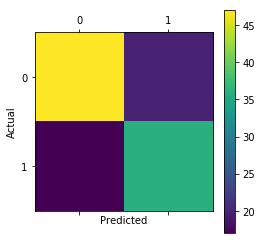

In [95]:
import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [79]:
##Accuracy of the test instances
print knnclf.score(vs_test_norm, vs_target_test)

0.6916666666666667


In [80]:
##Accuracy of training data
print knnclf.score(vs_train_norm, vs_target_train)

1.0


I started with k = 5 and weight = distance and the model produced a test accuracy of 0.6833 and train accuracy = 1 and fscore = 0.68.
With k = 4, the accuracy when down and k = 7 the accuracy stayed the same.
I chose k = 6, because this produced the best test accuracy of 0.69.
I then when with k = 6 and weight = uniform.  This decreased the training accuracy from 1 to 0.72, but the test accuracy stayed about the same.  The precision also decreased.

In [81]:
from sklearn import tree, naive_bayes

### c.Repeat the classification using scikit-learn's decision tree classifier

In [108]:
treeclf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 4)
treeclf = treeclf.fit(vs_train,vs_target_train)
treepred_test = treeclf.predict(vs_test)
print treepred_test

['YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO'
 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [109]:
print "The test accuracy is:" 
print treeclf.score(vs_test, vs_target_test)

print "The training accuracy is"
print treeclf.score(vs_train, vs_target_train)

The test accuracy is:
0.8583333333333333
The training accuracy is
0.975


Compared to the knn model, the decision tree model produces better accuracy for the test set, and similar accuracy for the training set. The decision tree also produces better precision and recall.

In [90]:
print(classification_report(vs_target_test, treepred_test))

             precision    recall  f1-score   support

         NO       0.89      0.85      0.87        67
        YES       0.82      0.87      0.84        53

avg / total       0.86      0.86      0.86       120



In [93]:
treecm = confusion_matrix(vs_target_test, treepred_test)
print treecm

[[57 10]
 [ 7 46]]


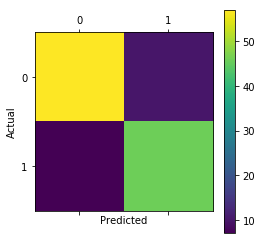

In [96]:
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Bayes classifier

In [99]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(vs_train, vs_target_train)
nbpred_test = nbclf.predict(vs_test)
print nbpred_test

['NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO'
 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES'
 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [100]:
print "The test accuracy is:" 
print nbclf.score(vs_test, vs_target_test)

print "The training accuracy is"
print nbclf.score(vs_train, vs_target_train)

The test accuracy is:
0.6833333333333333
The training accuracy is
0.6520833333333333


In [101]:
print(classification_report(vs_target_test, nbpred_test))

             precision    recall  f1-score   support

         NO       0.70      0.76      0.73        67
        YES       0.66      0.58      0.62        53

avg / total       0.68      0.68      0.68       120



In [102]:
nbcm = confusion_matrix(vs_target_test, treepred_test)
print nbcm

[[57 10]
 [ 7 46]]


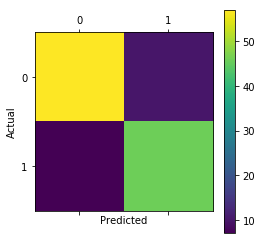

In [103]:
import pylab as plt
%matplotlib inline
plt.matshow(nbcm)
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The knn and bayes models are very similar and have around the same test accuracy. However, the knn model has better training accuracy.  Of the three models, the decision tree has the best test accuracy and f1-score.  If I were to choose a model to use, I would pick the decision tree model.

All models produce similar results, but only the knn and decision tree allow you to change up parameters to produce different results.  In terms of use, all classifiers are equally simple to use and interpret using sklearn.

### 3.Data Analysis and Predictive Modeling on Census data

a. Preprocessing and data analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('C:\\Users\\erica\\OneDrive for Business\\01 Current Classes\\DSC478 - Machine Programming\\Assignment2')
vstable3 = pd.read_csv("adult-modified.csv", na_values=["?"] )
vstable3.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


In [4]:
##Missing values
vstable3.shape

(10000, 8)

In [50]:
vstable3[vstable3.workclass.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
27,NaN,NaN,10,Married,Asian,Male,60,>50K
61,32.0,NaN,4,Married,White,Male,40,<=50K
69,25.0,NaN,10,Single,White,Male,40,<=50K
77,67.0,NaN,6,Married,White,Male,2,<=50K
106,17.0,NaN,6,Single,White,Female,32,<=50K
128,35.0,NaN,9,Married,White,Male,40,<=50K
149,43.0,NaN,10,Single,White,Female,40,<=50K
154,52.0,NaN,9,Single,White,Male,45,>50K
160,68.0,NaN,2,Single,White,Female,20,<=50K
187,53.0,NaN,13,Single,White,Female,50,<=50K


In [6]:
##drop instances with missing values for categorical values
vstable3.dropna(axis=0, inplace=True)
vstable3.shape

(9223, 8)

In [7]:
##Fill in null education values with the education mean
education_mean = vstable3.education.mean()
vstable3.education.fillna(education_mean, axis=0, inplace=True)

In [8]:
##Fill in null hours values with hours mean
hours_mean = vstable3["hours-per-week"].mean()
vstable3["hours-per-week"].fillna(hours_mean, axis=0, inplace=True)

In [9]:
##Fill in null age values with the education mean
age_mean = vstable3.age.mean()
vstable3.age.fillna(age_mean, axis=0, inplace=True)

In [10]:
vstable3.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


#### Examine the characteristics of the attributes

In [11]:
vstable3.describe()

,age,education,hours-per-week
count,9223.000000,9223.000000,9223.000000
mean,38.364632,10.125881,41.064946
std,13.094185,2.539962,11.886245
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


Text(0.5,1,'Histogram of Age')

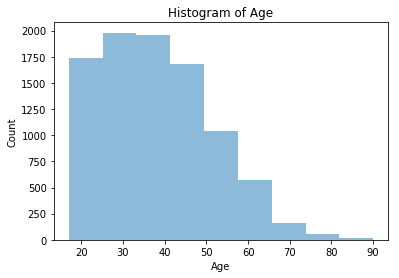

In [11]:
##Age histogram
plt.hist(vstable3["age"], bins=9, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')

Text(0,0.5,'Frequency')

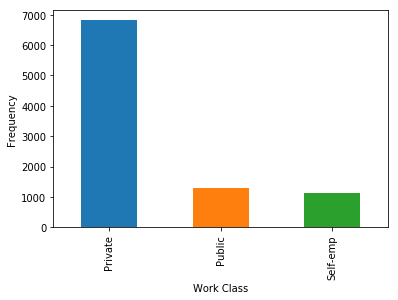

In [12]:
plotwc = vstable3.groupby('workclass').size().plot(kind='bar')
plotwc.set_xlabel('Work Class')
plotwc.set_ylabel("Frequency")

Text(0,0.5,'Frequency')

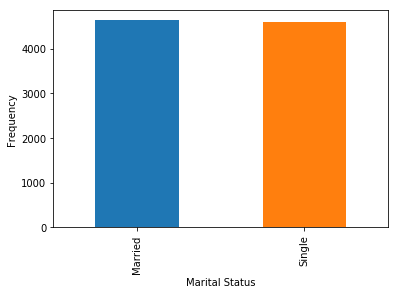

In [13]:
plotms = vstable3.groupby('marital-status').size().plot(kind='bar')
plotms.set_xlabel('Marital Status')
plotms.set_ylabel("Frequency")

Text(0,0.5,'Frequency')

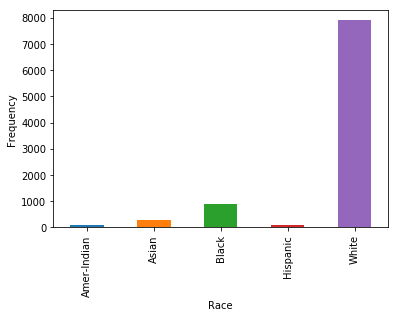

In [14]:
plotr = vstable3.groupby('race').size().plot(kind='bar')
plotr.set_xlabel('Race')
plotr.set_ylabel("Frequency")

Text(0,0.5,'Frequency')

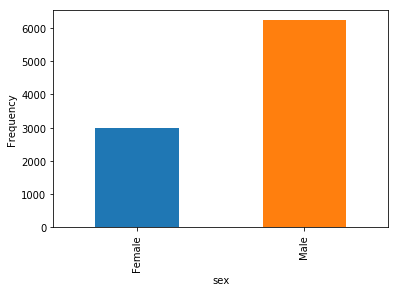

In [15]:
plotsx = vstable3.groupby('sex').size().plot(kind='bar')
plotsx.set_xlabel('sex')
plotsx.set_ylabel("Frequency")

TypeError: 'Text' object is not callable

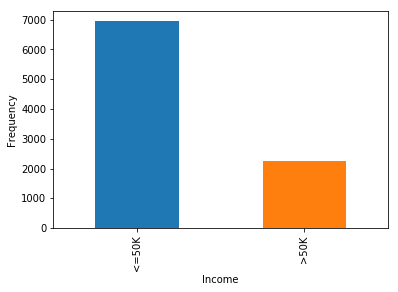

In [16]:
ploti = vstable3.groupby('income').size().plot(kind='bar')
ploti.set_xlabel('Income')
ploti.set_ylabel("Frequency")
ploti.title('Bar Char of Income')

Text(0.5,1,'Histogram of Education')

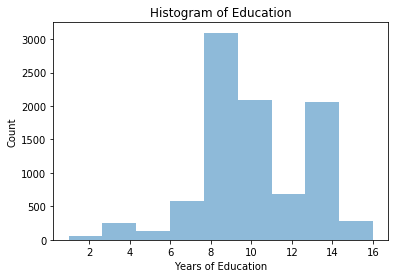

In [17]:
##Education histogram
plt.hist(vstable3["education"], bins=9, alpha=0.5)
plt.xlabel('Years of Education')
plt.ylabel('Count')
plt.title('Histogram of Education')

Text(0.5,1,'Histogram of Hours')

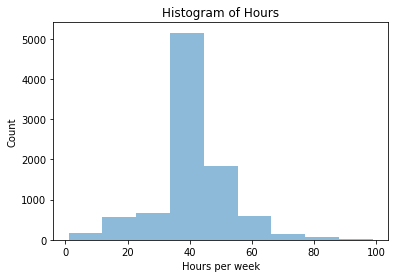

In [18]:
##Hours histogram
plt.hist(vstable3["hours-per-week"], bins=9, alpha=0.5)
plt.xlabel('Hours per week')
plt.ylabel('Count')
plt.title('Histogram of Hours')

Cross Tabulations

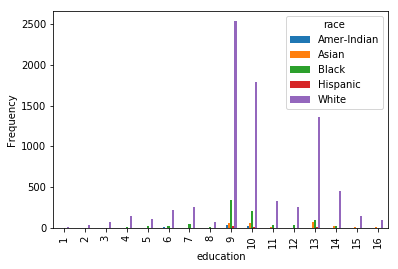

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,35
3,0,4,5,1,70
4,5,5,13,6,147
5,0,3,19,2,114
6,8,3,30,4,223
7,4,6,47,4,255
8,0,2,17,3,75
9,34,66,341,23,2535


In [19]:
## education+race Cross tabulation
plot1 = pd.crosstab(vstable3['education'], vstable3['race']).plot(kind='bar')
plot1.set_ylabel("Frequency")
plt.show(plot1)

pd.crosstab(vstable3['education'], vstable3['race'])

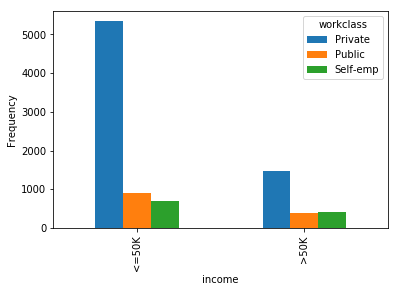

workclass,Private,Public,Self-emp
income,,,
<=50K,5348,904,705
>50K,1473,382,411


In [20]:
##workclass+income
plot3 = pd.crosstab(vstable3['income'], vstable3['workclass']).plot(kind='bar')
plot3.set_ylabel("Frequency")
plt.show(plot3)

pd.crosstab(vstable3['income'], vstable3['workclass'])

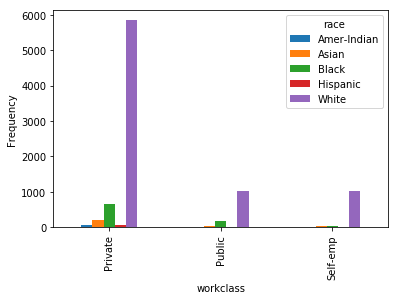

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
Private,62,200,652,63,5844
Public,20,48,187,5,1026
Self-emp,7,37,36,6,1030


In [21]:
##work-class + race
plot2 = pd.crosstab(vstable3['workclass'], vstable3['race']).plot(kind='bar')
plot2.set_ylabel("Frequency")
plt.show(plot2)

pd.crosstab(vstable3['workclass'], vstable3['race'])

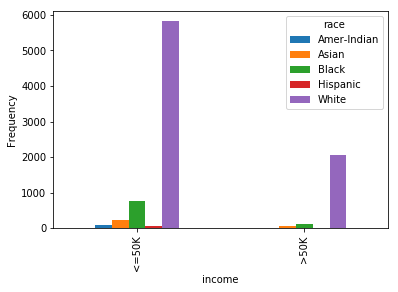

race,Amer-Indian,Asian,Black,Hispanic,White
income,,,,,
<=50K,80,219,759,68,5831
>50K,9,66,116,6,2069


In [22]:
##income + race
plot2 = pd.crosstab(vstable3['income'], vstable3['race']).plot(kind='bar')
plot2.set_ylabel("Frequency")
plt.show(plot2)

pd.crosstab(vstable3['income'], vstable3['race'])

In [23]:
##percentages of each race category that fall in the low-income group.
pd.crosstab(vstable3['income'], vstable3['race'])/vstable3.shape[0]

race,Amer-Indian,Asian,Black,Hispanic,White
income,,,,,
<=50K,0.008674,0.023745,0.082294,0.007373,0.632224
>50K,0.000976,0.007156,0.012577,0.000651,0.224330


The majority of people that are white have an income less than 50K.  As a whole the majority of all people in all races have income less that 50k.  Of the people that have an income > 50k, white people make up the majority.  From the workclass vs race cross-tab, you can see that most people work in the private class, and in that private class, most people have an income less than 50k.

In [24]:
pd.crosstab(vstable3['income'], vstable3['workclass'])/vstable3.shape[0]

workclass,Private,Public,Self-emp
income,,,
<=50K,0.579855,0.098016,0.076439
>50K,0.159709,0.041418,0.044563


In [25]:
pd.crosstab(vstable3['income'], vstable3['education'])/vstable3.shape[0]

education,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
income,,,,,,,,,,,,,,,,
<=50K,0.001301,0.004554,0.008132,0.017565,0.014312,0.026564,0.032853,0.009758,0.269652,0.184756,0.031552,0.023420,0.098341,0.023853,0.004771,0.002927
>50K,0.000000,0.000108,0.000542,0.001518,0.000651,0.002494,0.001410,0.000759,0.055513,0.041310,0.009758,0.008891,0.069825,0.030793,0.013011,0.009108


The majority of people that have an income <=50k work in the Private sector and 26% of the people wit income <=50k have 9 years of education. The majority of people with >50k income are white, and also work in the private sector.


### 3. b.Predictive Modeling and Model Evaluation:
Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then
separate the target attribute ("income_>50K") from the attributes used for training

In [12]:
vstable3_matrix = pd.get_dummies(vstable3[['age', 'workclass', 'education','marital-status','race','sex','hours-per-week','income']])
vstable3_matrix.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0


In [13]:
##drop income <=50k column
vstable4_matrix = vstable3_matrix.drop(['income_<=50K'], axis=1)
vstable4_matrix.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_>50K
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1,0
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1,0
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1,0
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1,0
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0,0


In [14]:
##target attribute
vs_target = vstable4_matrix['income_>50K']
vs_target.head()

0    0
1    0
2    0
3    0
4    0
Name: income_>50K, dtype: uint8

In [15]:
##attribute matrix
vs_record_matrix = pd.get_dummies(vstable3[['age', 'workclass', 'education','marital-status','race','sex','hours-per-week']])
vs_record_matrix.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0


### Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA).

In [16]:
##divide into training and test sets
from sklearn.cross_validation import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_record_matrix, vs_target, test_size=0.2, random_state = 35)

print (vs_test.shape)
vs_test[0:5]

(1845, 15)


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
570,24.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1
9143,59.0,4,48,0,0,1,1,0,0,0,0,0,1,0,1
6445,19.0,9,40,1,0,0,0,1,0,0,1,0,0,1,0
8121,32.0,13,40,1,0,0,1,0,0,0,0,0,1,0,1
5463,53.0,6,40,1,0,0,1,0,0,0,0,0,1,1,0


In [17]:
print (vs_train.shape)
vs_train[0:5]

(7378, 15)


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
9072,37.0,13,50,0,0,1,1,0,0,0,0,1,0,0,1
8786,57.0,9,38,0,0,1,1,0,0,0,0,0,1,1,0
5487,29.0,9,40,1,0,0,1,0,0,0,0,0,1,0,1
7445,34.0,9,50,1,0,0,1,0,0,0,0,0,1,0,1
4244,42.0,12,40,0,0,1,1,0,0,0,0,0,1,0,1


In [18]:
##Bayes Classifier
from sklearn import tree, naive_bayes
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(vs_train, vs_target_train)

from sklearn import cross_validation
cv_scores_nb = cross_validation.cross_val_score(nbclf, vs_train, vs_target_train, cv=10)
cv_scores_nb
print("Accuracy Using Cross Validation: %0.2f (+/- %0.2f)" % (cv_scores_nb.mean(), cv_scores_nb.std() * 2))

Accuracy Using Cross Validation: 0.72 (+/- 0.04)


In [19]:
##Decision Tree
treeclf =  tree.DecisionTreeClassifier(criterion='entropy',random_state=10)
treeclf = treeclf.fit(vs_train, vs_target_train)

cv_scores_tree = cross_validation.cross_val_score(treeclf, vs_train, vs_target_train, cv=10)
cv_scores_tree
print("Accuracy Using Cross Validation: %0.2f (+/- %0.2f)" % (cv_scores_tree.mean(), cv_scores_tree.std() * 2))

Accuracy Using Cross Validation: 0.77 (+/- 0.03)


In [20]:
##Linear DA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(vs_train, vs_target_train)

cv_scores_ld = cross_validation.cross_val_score(ldclf, vs_train, vs_target_train, cv=10)
cv_scores_ld
print("Accuracy Using Cross Validation: %0.2f (+/- %0.2f)" % (cv_scores_ld.mean(), cv_scores_ld.std() * 2))

Accuracy Using Cross Validation: 0.81 (+/- 0.02)


C:\Users\erica\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [21]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import cross_validation

In [34]:
##trim the tree to reduce the size
treeclf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 4)
cv_scores = cross_validation.cross_val_score(treeclf,  vs_train, vs_target_train, cv=10)
cv_scores_tree
print("Accuracy Using Cross Validation: %0.2f (+/- %0.2f)" % (cv_scores_tree.mean(), cv_scores_tree.std() * 2))
treeclf = treeclf.fit(vs_train, vs_target_train)

Accuracy Using Cross Validation: 0.77 (+/- 0.03)


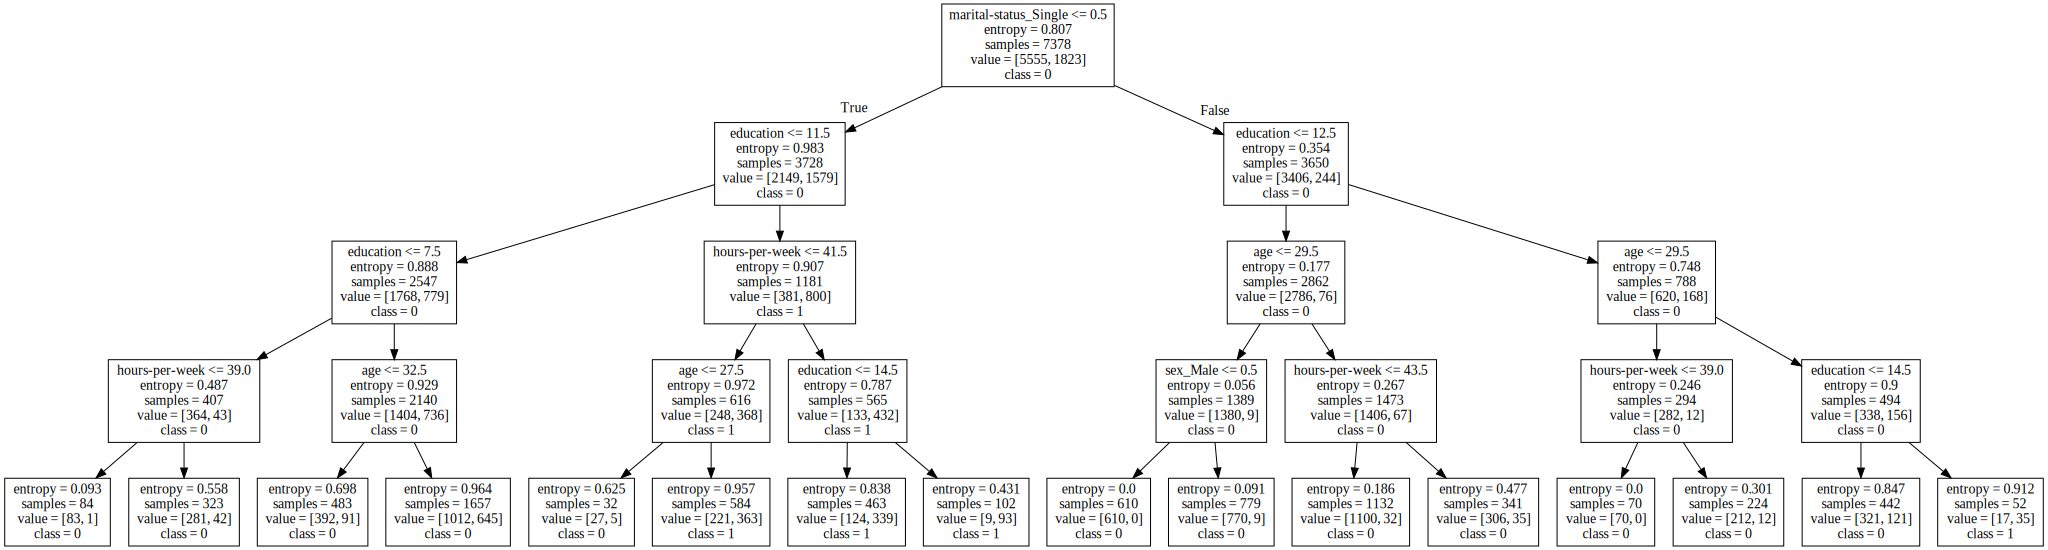

In [37]:
export_graphviz(treeclf, out_file="tree.dot", feature_names = vs_train.columns, class_names=["0", "1"])

with open("tree.dot") as f:
        dot_graph = f.read()
graphviz.Source(dot_graph)